In [1]:
# !pip install pytesseract
# !pip install pyenchant
# !pip install nltk
# !pip install polyglot
!pip install gensim


[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 24.0/24.0 MB 5.0 MB/s eta 0:00:00


# TEXT PREPROCESSING

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
myurl = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"
html = urlopen(myurl).read()
soupified = BeautifulSoup(html, "html.parser")
question = soupified.find("div", {"class": "question"})
questiontext = question.find("div", {"class": "post-text"})


In [ ]:
print("Question: \n", questiontext.get_text().strip())
answer = soupified.find("div", {"class": "answer"})

# UNICODE CONVERSION AND SPELL CHECK
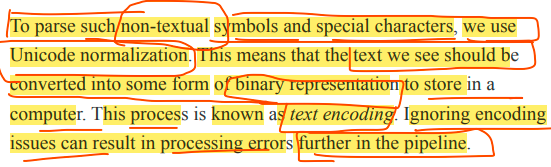

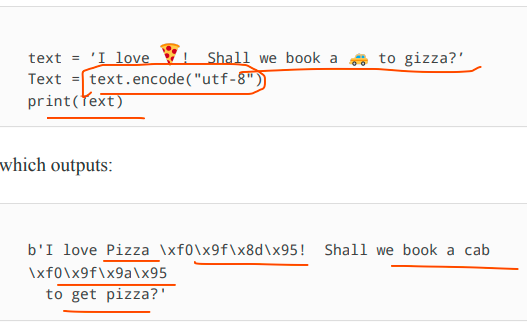

In [ ]:
import requests
import json
api_key = "XXXXxxxxxxxxxxxx"
endpoint ='XXXXxxxxxxxxxxxx'
example_text = "Hollo, wrld" # the text to be spell-checked
data = {'text': example_text}
params = {
    'mkt':'en-us',
    'mode':'proof'
    }


In [ ]:
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'Ocp-Apim-Subscription-Key': api_key,
}
response = requests.post(endpoint, headers=headers,
params=params, data=data)
json_response = response.json()
print(json.dumps(json_response, indent=4))

# TEXT EXTRACTION USING TESSERACT

In [ ]:
from PIL import Image
from pytesseract import image_to_string
filename = "SS.png"
text = image_to_string(Image.open(filename))
print(text)


    CORRECTING SPELLINGS

In [ ]:
import enchant
d = enchant.Dict("en_US")
d.check("Hello")
True
d.check("Helo")
False
d.suggest("Helo")

# ['He lo', 'He-lo', 'Hello', 'Helot', 'Help', 'Halo', 'Hell', 'Held', 'Helm', 'Hero', "He'll"]


# TEXT SPLITING
The code example below shows how to use a
sentence and word splitter from NLTK and uses the first paragraph of
this chapter as input

In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize
mytext = """In the previous chapter, we saw examples of some commonNLPapplications that we might encounter in everyday life. If we wereasked to build such an application, think about how we would approach doing
                so at our organization. We would normally walk through the requirements and break the
                    problem down into several sub-problems, then try to develop a
                    step-by-step
                    procedure to solve them. Since language processing is involved, we
                    would also
                    list all the forms of text processing needed at each step. This
                    step-by-step
                    processing of text is known as pipeline. It is the series of
                    steps involved in
                    building any NLP model. These steps are common in every NLP
                    project, so it
                    makes sense to study them in this chapter. Understanding some
                    common procedures
                    in any NLP pipeline will enable us to get started on any NLP
                    problem encountered
                    in the workplace. Laying out and developing a text-processing
                    pipeline is seen
                    as a starting point for any NLP application development process.
                    In this
                    chapter, we will learn about the various steps involved and how
                    they play
                    important roles in solving the NLP problem and we’ll see a few
                    guidelines
                    about when and how to use which step. In later chapters, we’ll
                    discuss
                    specific pipelines for various NLP tasks (e.g., Chapters 4–7)."""

# sent_tokenize(mytext)
_tokens = []
for sentence in sent_tokenize(mytext):
 _tokens.append((sentence,word_tokenize(sentence)))

_tokens[1]


('If we wereasked to build such an application, think about how we would approach doing\n                so at our organization.',
 ['If',
  'we',
  'wereasked',
  'to',
  'build',
  'such',
  'an',
  'application',
  ',',
  'think',
  'about',
  'how',
  'we',
  'would',
  'approach',
  'doing',
  'so',
  'at',
  'our',
  'organization',
  '.'])

The code example below shows how to remove stop words, digits,
and punctuation and lowercase a given collection of texts:


In [18]:
from nltk.corpus import stopwords
from string import punctuation
def preprocess_corpus(texts):
    mystopwords = set(stopwords.words("english"))
    def remove_stops_digits(tokens):
        return [token.lower() for token in tokens if token not in mystopwords and not token.isdigit() and token not in punctuation]
    
    return [remove_stops_digits(word_tokenize(text)) for text in texts]

# preprocess_corpus(_tokens[0][0])

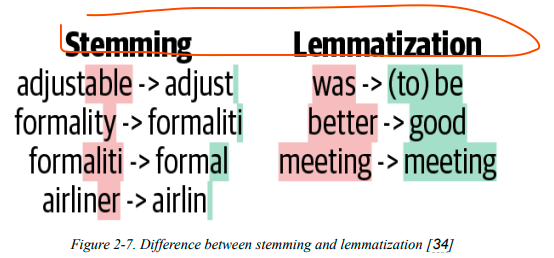

The following code snippet shows how to use a popular stemming
algorithm called Porter Stemmer using NLTK

In [19]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
word1, word2 = 'cars', 'revolution'
print(stemmer.stem(word1), stemmer.stem(word2))

car revolut


In [25]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("joy", pos="a")) #a is for


joy


language detection is
performed as the first step in an NLP pipeline. We can use libraries
like Polyglot

In [ ]:
import polyglot
from polyglot.text import Text, Word

text = Text("Bonjour, Mesdames.")
print("Language Detected: Code={}, Name={}\n".format(text.language.code, text.language.name))

#Language Detected: Code=fr, Name=French

POS TAGGING

In [41]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u'Charles Spencer Chaplin was born on 16 April 1889 toHannah Chaplin (born Hannah Harriet Pedlingham Hill) and Charles Chaplin Sr')
for token in doc:
 print(f"""{token.text + " "*(14 -len(token.text))}  ||  {token.lemma_+ " "*(14 -len(token.lemma_))}  ||  {token.pos_+ " "*(14 -len(token.pos_))}  ||  {token.shape_+ " "*(14 -len(token.shape_))}    ||  {token.is_alpha}    ||  {token.is_stop }""")

Charles         ||  Charles         ||  PROPN           ||  Xxxxx             ||  True    ||  False
Spencer         ||  Spencer         ||  PROPN           ||  Xxxxx             ||  True    ||  False
Chaplin         ||  Chaplin         ||  PROPN           ||  Xxxxx             ||  True    ||  False
was             ||  be              ||  AUX             ||  xxx               ||  True    ||  True
born            ||  bear            ||  VERB            ||  xxxx              ||  True    ||  False
on              ||  on              ||  ADP             ||  xx                ||  True    ||  True
16              ||  16              ||  NUM             ||  dd                ||  False    ||  False
April           ||  April           ||  PROPN           ||  Xxxxx             ||  True    ||  False
1889            ||  1889            ||  NUM             ||  dddd              ||  False    ||  False
toHannah        ||  toHannah        ||  PROPN           ||  xxXxxxx           ||  True    ||  False


# METRICS EVALUATION

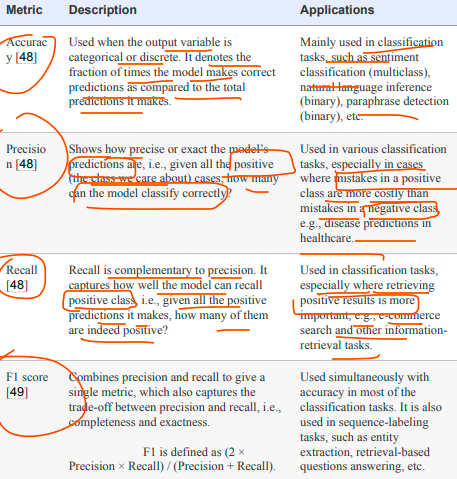 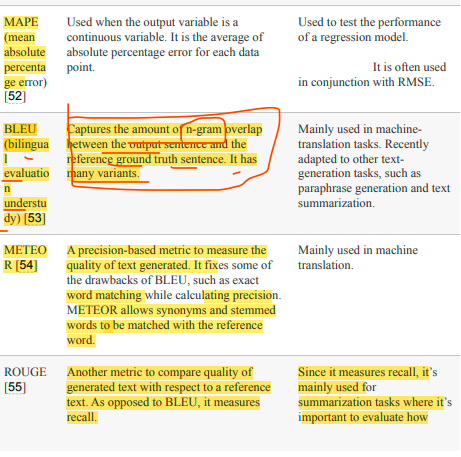 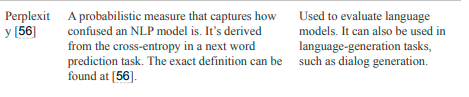

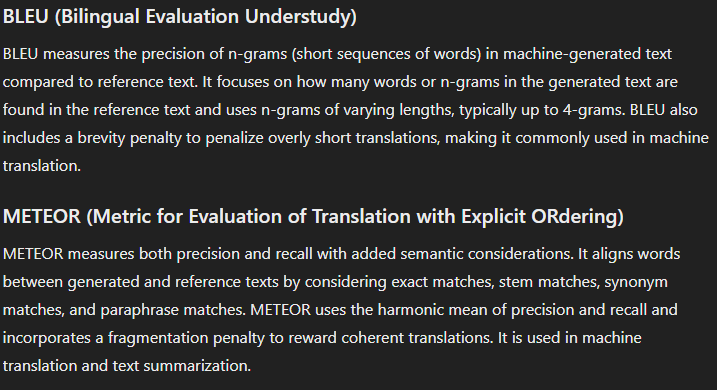
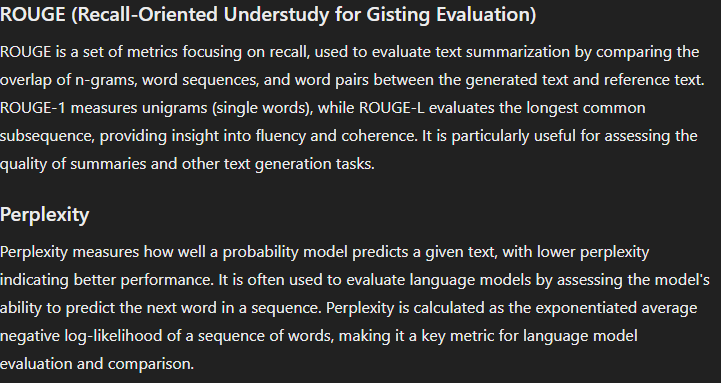

# meteor

In [66]:
# meteor_score
import nltk
from nltk.translate.meteor_score import meteor_score

# Ensure the necessary nltk data files are downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

# Define reference and hypothesis sentences
reference = "The cat is on the mat"
hypothesis = "The cat is sitting on the mat"



# Tokenize the sentences
reference_tokenized = word_tokenize(reference)
hypothesis_tokenized = word_tokenize(hypothesis)

# Calculate METEOR score
score = meteor_score([reference_tokenized], hypothesis_tokenized)

print(f"METEOR Score: {score:.4f}")


METEOR Score: 0.9654


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SIVERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SIVERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# bleu

In [63]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Define reference and hypothesis sentences
reference = "The cat is on the mat"
hypothesis = "The cat is sitting on the mat"

# Convert the sentences to lists of words
reference_list = [reference.split()]
hypothesis_list = hypothesis.split()

# Calculate BLEU score
smoothie = SmoothingFunction().method4
score = sentence_bleu(reference_list, hypothesis_list, smoothing_function=smoothie)

print(f"BLEU Score: {score:.4f}")


BLEU Score: 0.3247


# rouge_scorer

In [73]:
from rouge_score import rouge_scorer

# Define reference and hypothesis sentences
reference = "The cat is on the mat"
hypothesis = "on the mat the cat is sitting "

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score(reference, hypothesis)

print(f"ROUGE-1 Score: {scores['rouge1'].fmeasure:.4f}")
print(f"ROUGE-L Score: {scores['rougeL'].fmeasure:.4f}")


ROUGE-1 Score: 0.9231
ROUGE-L Score: 0.4615


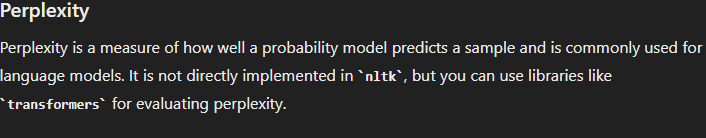

In [60]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load pre-trained model and tokenizer
model_name = './gpt'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Define the hypothesis sentence
hypothesis = "The cat is sitting on the mat"

# Encode the sentence and get tensor input
input_ids = tokenizer.encode(hypothesis, return_tensors='pt')

# Get the loss (negative log likelihood)
with torch.no_grad():
    outputs = model(input_ids, labels=input_ids)
    loss = outputs.loss
    perplexity = torch.exp(loss)

print(f"Perplexity: {perplexity.item():.4f}")


Perplexity: 61.1930


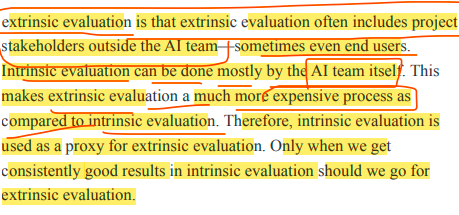

In [83]:
import random
from nltk.corpus import wordnet
from nltk.corpus import stopwords
random.seed(1)
stop_words = set(stopwords.words('english'))
# Function to get synonyms
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' abcdefghijklmnopqrstuvwxyz'])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Synonym Replacement
def synonym_replacement(words, n):
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break

    return new_words

# Random Insertion
def random_insertion(words, n):
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    return new_words

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = new_words[random.randint(0, len(new_words) - 1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(new_words) - 1)
    new_words.insert(random_idx, random_synonym)

# Random Swap
def random_swap(words, n):
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)
    return new_words

def swap_word(new_words):
    random_idx_1 = random.randint(0, len(new_words) - 1)
    random_idx_2 = random_idx_1
    counter = 0
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words) - 1)
        counter += 1
        if counter > 3:
            return new_words
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
    return new_words

# Random Deletion
def random_deletion(words, p):
    if len(words) == 1:
        return words

    new_words = []
    for word in words:
        r = random.uniform(0, 1)
        if r > p:
            new_words.append(word)

    if len(new_words) == 0:
        rand_int = random.randint(0, len(words) - 1)
        return [words[rand_int]]

    return new_words

# EDA Wrapper Function
def eda(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=4):
    words = sentence.split()
    num_words = len(words)
    
    augmented_sentences = []
    num_new_per_technique = int(num_aug / 4) + 1
    
    n_sr = max(1, int(alpha_sr * num_words))
    n_ri = max(1, int(alpha_ri * num_words))
    n_rs = max(1, int(alpha_rs * num_words))
    
    # Synonym Replacement
    for _ in range(num_new_per_technique):
        a_words = synonym_replacement(words, n_sr)
        augmented_sentences.append(' '.join(a_words))
    
    # Random Insertion
    for _ in range(num_new_per_technique):
        a_words = random_insertion(words, n_ri)
        augmented_sentences.append(' '.join(a_words))
    
    # Random Swap
    for _ in range(num_new_per_technique):
        a_words = random_swap(words, n_rs)
        augmented_sentences.append(' '.join(a_words))
    
    # Random Deletion
    for _ in range(num_new_per_technique):
        a_words = random_deletion(words, p_rd)
        augmented_sentences.append(' '.join(a_words))
    
    augmented_sentences = [sentence for sentence in augmented_sentences if sentence != sentence]
    random.shuffle(augmented_sentences)
    
    if num_aug >= 1:
        augmented_sentences = augmented_sentences[:num_aug]
    else:
        keep_prob = num_aug / len(augmented_sentences)
        augmented_sentences = [sentence for sentence in augmented_sentences if random.uniform(0, 1) < keep_prob]
    
    augmented_sentences.append(sentence)
    
    return augmented_sentences

In [86]:
# Example Usage
sentence = "how the brown big fox not running properly"
augmented_sentences = eda(sentence,alpha_sr=0.5, alpha_ri=0.51, alpha_rs=0.51, p_rd=0.51, num_aug=5)
# for aug_sentence in augmented_sentences:
print(augmented_sentences)


['how the brown big fox not running properly']



# <span style="color:Yellow">Numeric Representation</span>

Following is details regarding how music is processed


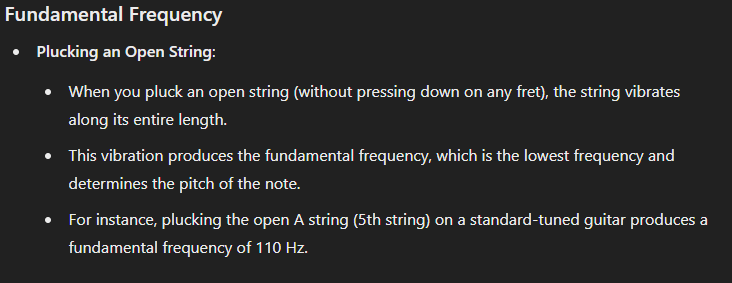
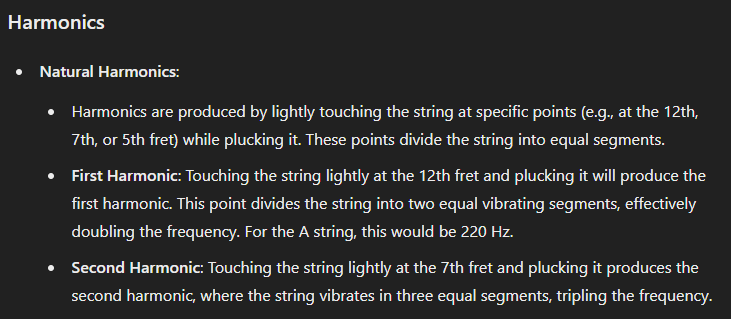

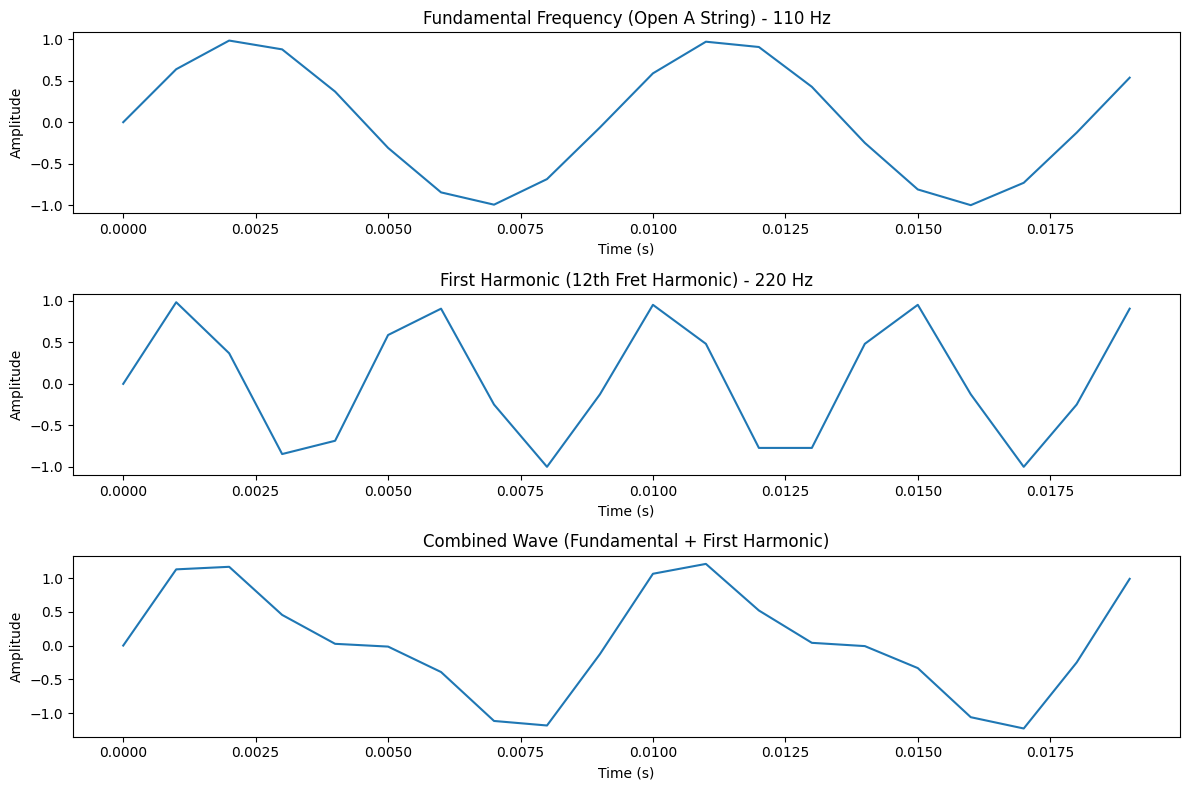

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 1000  # Samples per second
duration = 0.02  # Duration in seconds for visualization
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)  # Time array

# Generate sine waves
fundamental_freq = 110  # Fundamental frequency of open A string in Hz
first_harmonic_freq = 2 * fundamental_freq  # First harmonic frequency

# Sine waves
fundamental_wave = np.sin(2 * np.pi * fundamental_freq * t)
first_harmonic_wave = np.sin(2 * np.pi * first_harmonic_freq * t)

# Combined wave
combined_wave = fundamental_wave + 0.5 * first_harmonic_wave  # Adding first harmonic with half amplitude

plt.figure(figsize=(12, 8))

# Fundamental wave
plt.subplot(3, 1, 1)
plt.plot(t, fundamental_wave)
plt.title('Fundamental Frequency (Open A String) - 110 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# First harmonic wave
plt.subplot(3, 1, 2)
plt.plot(t, first_harmonic_wave)
plt.title('First Harmonic (12th Fret Harmonic) - 220 Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Combined wave
plt.subplot(3, 1, 3)
plt.plot(t, combined_wave)
plt.title('Combined Wave (Fundamental + First Harmonic)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# COUNT VECTORIZER

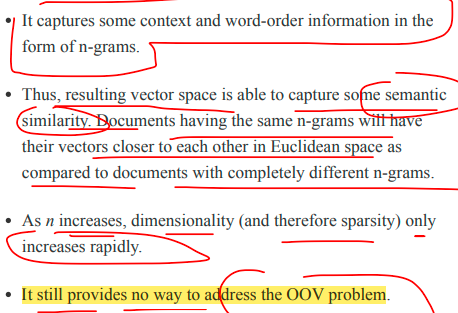

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample documents
documents = [
    "The quick brown fox",
    "jumps over the lazy dog",
    "The fox is quick and the dog is lazy"
]

# Initialize CountVectorizer with n-gram range
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Unigrams and bigrams

# Fit and transform the documents
X = vectorizer.fit_transform(documents)


In [21]:
X[0].toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 1]], dtype=int64)

In [28]:
dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1]))

{'and': 0,
 'and the': 1,
 'brown': 2,
 'brown fox': 3,
 'dog': 4,
 'dog is': 5,
 'fox': 6,
 'fox is': 7,
 'is': 8,
 'is lazy': 9,
 'is quick': 10,
 'jumps': 11,
 'jumps over': 12,
 'lazy': 13,
 'lazy dog': 14,
 'over': 15,
 'over the': 16,
 'quick': 17,
 'quick and': 18,
 'quick brown': 19,
 'the': 20,
 'the dog': 21,
 'the fox': 22,
 'the lazy': 23,
 'the quick': 24}

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
text1 = vectorizer.transform(["The quick fox"])
text2 = vectorizer.transform(["The quick brown fox"])
cosine_similarity(text1,text2)[0][0]


0.7559289460184544

# TF- IDF
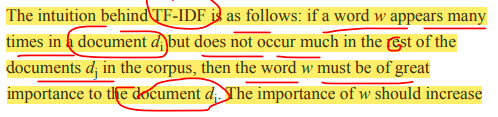                           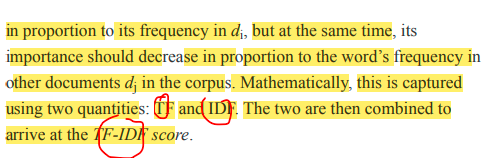 

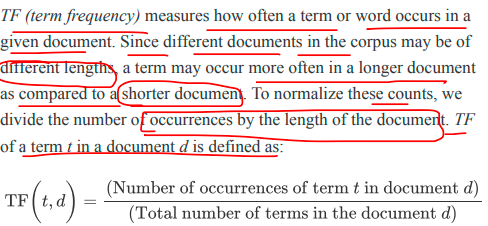          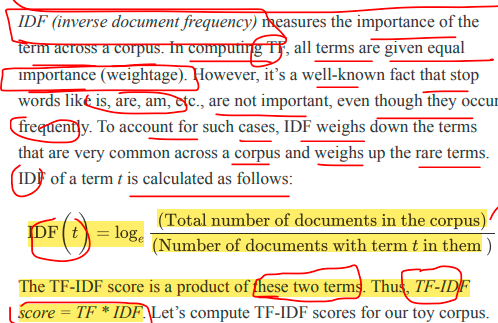

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample documents
documents = [
    "The quick brown sky sky sky fox jumps over the lazy dog",
    "The dog is lazy but the quick brown fox is energetic",
    "The fox jumps over the dog"
]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents to TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(documents)


In [44]:
dict(sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1]))

{'brown': 0,
 'but': 1,
 'dog': 2,
 'energetic': 3,
 'fox': 4,
 'is': 5,
 'jumps': 6,
 'lazy': 7,
 'over': 8,
 'quick': 9,
 'sky': 10,
 'the': 11}

In [45]:
tfidf_matrix[0].toarray()

array([[0.20336832, 0.        , 0.15793364, 0.        , 0.15793364,
        0.        , 0.20336832, 0.20336832, 0.20336832, 0.20336832,
        0.8022147 , 0.31586728]])

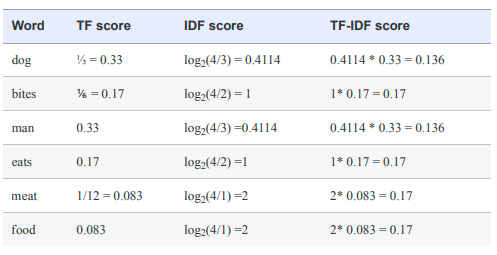

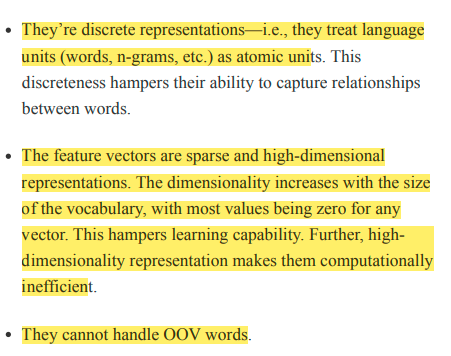

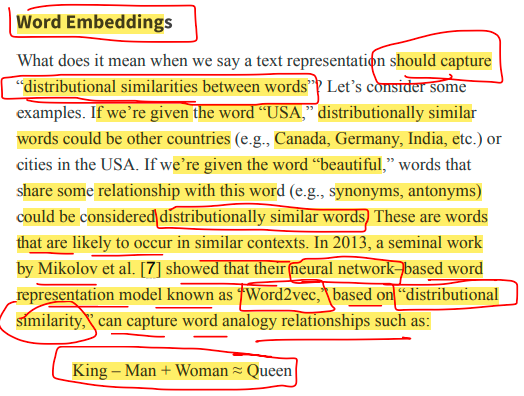

# Word2Vec

In [32]:
(cbow_model.wv['small'])

array([ 5.5226167e-03,  5.5519077e-03,  1.8161895e-03,  5.7628672e-03,
       -8.9040073e-03,  6.4804452e-03,  9.2778606e-03, -4.0350803e-03,
        1.5535111e-03, -5.2563897e-03,  1.0566077e-03,  2.7080143e-03,
        8.1165694e-03,  5.8668759e-04,  2.5650635e-03,  1.2813688e-03,
        8.3943652e-03, -5.7914122e-03, -6.3073742e-03, -3.7591732e-03,
       -2.2933390e-03,  5.0852592e-03, -8.0896933e-03, -2.8393536e-03,
       -8.1869457e-03,  5.1577687e-03, -2.5654747e-03, -9.0927565e-03,
        4.0303753e-03,  9.0096910e-03, -3.0109969e-03, -5.8959057e-03,
        3.0514479e-03, -4.8403468e-04, -9.9889208e-03,  8.5280081e-03,
       -7.2736456e-03, -4.9523213e-03, -2.6495305e-03, -5.5455752e-03,
        1.7289821e-03,  9.6514178e-03,  4.5073484e-03,  8.0801593e-03,
       -4.2782797e-04,  6.2626804e-04, -2.6891096e-03, -8.8093802e-03,
        3.4910992e-03,  2.1333308e-03, -9.3916925e-03, -5.0032535e-03,
       -9.6984254e-03, -5.7525323e-03,  4.0700063e-03,  8.6535523e-03,
      

In [14]:
similar_words = w2v_model.wv.most_similar('small')
print(f"Words similar to 'Word2Vec': {similar_words}")


Words similar to 'Word2Vec': [('in', 0.3186648488044739), ('dense', 0.2522631585597992), ('saw', 0.18828390538692474), ('treasure', 0.16105981171131134), ('darkness', 0.16031256318092346), ('using', 0.14651791751384735), ('filled', 0.14414575695991516), ('jewels', 0.1316293627023697), ('faced', 0.13110259175300598), ('old', 0.13061872124671936)]


# CBOW - continous bag of words

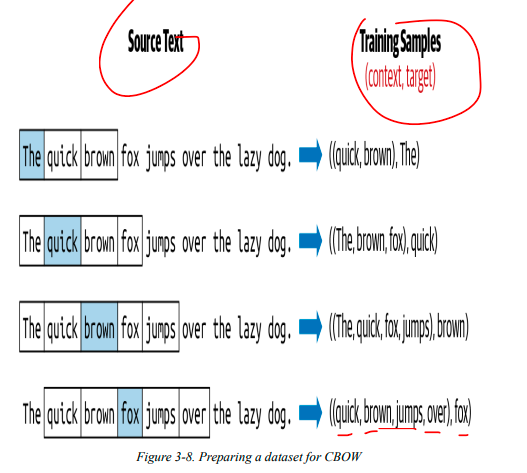

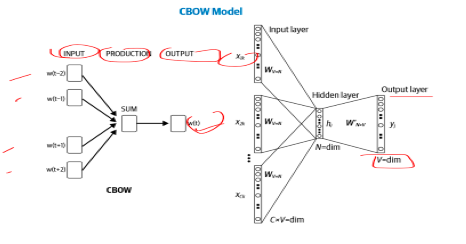
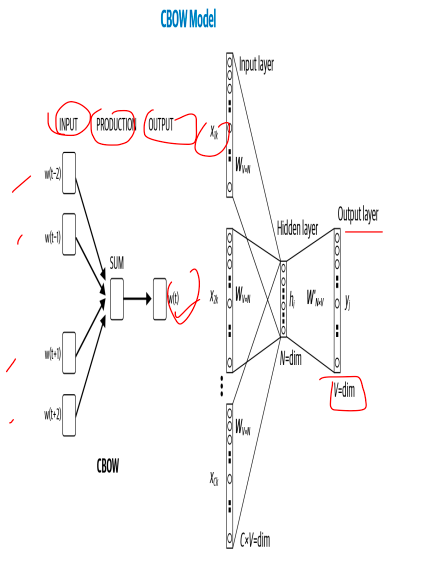
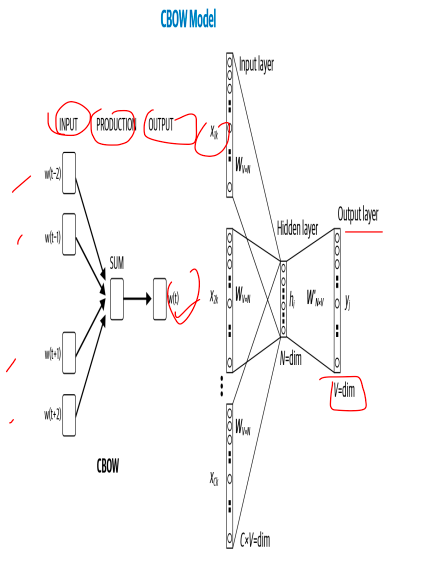

In [33]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Sample data
sentences = [
    "Once upon a time, in a small village, there lived a young boy named Jack.",
    "Jack was known for his curiosity and adventurous spirit.",
    "One sunny morning, Jack decided to explore the forest near his village.",
    "As he walked deeper into the forest, he discovered a hidden path.",
    "Following the path, Jack found a mysterious old map lying on the ground.",
    "The map led to a treasure buried deep within the forest.",
    "Excited by the discovery, Jack decided to follow the map's directions.",
    "He encountered various obstacles along the way.",
    "First, he had to cross a fast-flowing river with slippery rocks.",
    "With great effort, Jack managed to get to the other side.",
    "Next, he had to find his way through a dark and creepy cave.",
    "Using his flashlight, Jack carefully navigated through the cave.",
    "He heard strange noises and saw shadows moving in the darkness.",
    "Determined to find the treasure, Jack pressed on.",
    "After exiting the cave, he found himself in a dense part of the forest.",
    "The trees were tall and their branches intertwined, blocking the sunlight.",
    "Jack used the map to find a small clearing where the treasure was supposed to be.",
    "In the clearing, he saw a large, ancient oak tree with a hollow trunk.",
    "Jack reached inside the hollow and felt something metallic.",
    "He pulled out a small, rusty chest covered in dirt and roots.",
    "With trembling hands, Jack opened the chest and found it filled with gold coins and precious jewels.",
    "Overwhelmed with joy, Jack couldn't believe his luck.",
    "He knew he had to share this discovery with his village.",
    "Jack carefully repacked the chest and started his journey back home.",
    "On his way back, he was more cautious of the obstacles he had previously faced.",
    "When Jack finally returned to the village, he was greeted with curiosity and excitement.",
    "He told the villagers about his adventure and showed them the treasure.",
    "The village celebrated Jack's return and his incredible discovery.",
    "Jack became a hero, and his story was told for generations.",
    "From that day on, Jack continued to explore and seek out new adventures."
]

# Preprocess the sentences
preprocessed_sentences = [simple_preprocess(sentence) for sentence in sentences]

# Train the Word2Vec model
cbow_model = Word2Vec(sentences=preprocessed_sentences, vector_size=100, window=5, min_count=1, sg=0, workers=4)

# Save the model
cbow_model.save("cbow_model.model")



In [34]:
from gensim.models import Word2Vec

# Load the Word2Vec model
cbow_model = Word2Vec.load("cbow_model.model")

print("Model loaded.")


Model loaded.


In [35]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

doc = nlp("Canada is a large country")

print(doc.vector) #Averaged vector for the entire sentence

[-2.44864553e-01 -1.56845093e-01 -5.19747213e-02  5.86494327e-01
  8.10811371e-02 -1.65754959e-01  7.57052779e-01  2.63185829e-01
  1.40731540e-02  2.51211584e-01  2.43307829e-01 -2.79111505e-01
 -3.70179743e-01  5.22314608e-01 -5.23915231e-01  4.84678755e-03
  4.30857599e-01 -2.19760582e-01 -3.72532457e-01  1.71566412e-01
 -2.67528951e-01  2.24801712e-02 -3.03287268e-01 -1.04288265e-01
  1.51315525e-01 -5.31261563e-01  4.36048090e-01  2.97305405e-01
  4.72418249e-01  3.90211254e-01  2.69951254e-01  2.36672372e-01
  4.59462553e-01 -4.97865021e-01 -1.82450846e-01 -1.67997688e-01
  1.93978816e-01  5.16765952e-01 -2.88335234e-01  3.74710143e-01
 -1.11499786e-01  3.33660007e-01  5.49613833e-02  2.53970921e-01
 -5.02043843e-01  3.85194868e-01 -1.86397165e-01  8.60191226e-01
  2.11835712e-01 -1.24764606e-01 -7.09948897e-01  7.70933032e-01
 -1.79754347e-01 -6.63752079e-01 -4.01271433e-01  1.83464617e-01
 -2.96255052e-01  7.63848007e-01 -3.35624039e-01 -1.81755573e-01
  5.62857166e-02 -5.20982

# SKIP GRAM

In [36]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# The story corpus
story = [
    "Once upon a time, in a small village, there lived a young boy named Jack.",
    "Jack was known for his curiosity and adventurous spirit.",
    "One sunny morning, Jack decided to explore the forest near his village.",
    "As he walked deeper into the forest, he discovered a hidden path.",
    "Following the path, Jack found a mysterious old map lying on the ground.",
    "The map led to a treasure buried deep within the forest.",
    "Excited by the discovery, Jack decided to follow the map's directions.",
    "He encountered various obstacles along the way.",
    "First, he had to cross a fast-flowing river with slippery rocks.",
    "With great effort, Jack managed to get to the other side.",
    "Next, he had to find his way through a dark and creepy cave.",
    "Using his flashlight, Jack carefully navigated through the cave.",
    "He heard strange noises and saw shadows moving in the darkness.",
    "Determined to find the treasure, Jack pressed on.",
    "After exiting the cave, he found himself in a dense part of the forest.",
    "The trees were tall and their branches intertwined, blocking the sunlight.",
    "Jack used the map to find a small clearing where the treasure was supposed to be.",
    "In the clearing, he saw a large, ancient oak tree with a hollow trunk.",
    "Jack reached inside the hollow and felt something metallic.",
    "He pulled out a small, rusty chest covered in dirt and roots.",
    "With trembling hands, Jack opened the chest and found it filled with gold coins and precious jewels.",
    "Overwhelmed with joy, Jack couldn't believe his luck.",
    "He knew he had to share this discovery with his village.",
    "Jack carefully repacked the chest and started his journey back home.",
    "On his way back, he was more cautious of the obstacles he had previously faced.",
    "When Jack finally returned to the village, he was greeted with curiosity and excitement.",
    "He told the villagers about his adventure and showed them the treasure.",
    "The village celebrated Jack's return and his incredible discovery.",
    "Jack became a hero, and his story was told for generations.",
    "From that day on, Jack continued to explore and seek out new adventures."
]

# Preprocess the sentences
preprocessed_sentences = [simple_preprocess(sentence) for sentence in story]

# Train the Skip-gram model
skipgram_model = Word2Vec(sentences=preprocessed_sentences, vector_size=100, window=5, min_count=1, sg=1, workers=4)

# Save the model
skipgram_model.save("skipgram_model.model")


In [37]:

# Load the model
skipgram_model = Word2Vec.load("skipgram_model.model")
print("Skip-gram model loaded.")

# Get the vector for a word
vector = skipgram_model.wv['jack']
print(f"Vector for 'jack': {vector}")


Skip-gram model loaded.
Vector for 'jack': [-9.3018990e-03  4.0794639e-03  5.1114406e-03  5.7221460e-03
  7.9989340e-03 -6.9662142e-03  1.4849206e-03  7.1889558e-03
 -3.5477977e-03 -6.3200779e-03 -4.1606615e-04 -9.1156010e-03
 -5.7766703e-03  7.4821748e-03  3.2882225e-03  7.2156279e-03
  6.9735777e-03  6.7125019e-03 -4.3079732e-03 -1.7960226e-03
  2.4259125e-03 -4.1897609e-03  8.5105971e-03 -1.0184283e-02
  6.6485722e-03  3.1888813e-03 -4.7744322e-03  4.1181580e-03
 -2.1753358e-03  6.6562821e-03  1.0568846e-02 -4.7341217e-03
 -2.3487669e-04 -6.2700948e-03  3.1847300e-03  3.5848366e-03
  7.3870411e-03  5.9068315e-03  9.5711267e-03  8.4101949e-03
  7.9563865e-03 -7.6338467e-03 -9.7896652e-03 -2.1764044e-04
 -2.4772545e-03  7.6854280e-03  5.8558630e-03 -1.7567759e-03
  1.7104649e-03  2.1769323e-03  8.2860179e-03 -1.0054949e-02
  5.6440520e-05  3.1980143e-03 -8.6652610e-04  8.3264532e-03
  9.3420502e-03  6.3946038e-03 -1.3002905e-03  8.0774026e-03
 -8.7083606e-03  3.3658403e-03 -3.9704274e

In [38]:

# Find similar words
similar_words = skipgram_model.wv.most_similar('jack')
print(f"Words similar to 'jack': {similar_words}")

Words similar to 'jack': [('their', 0.2287261039018631), ('for', 0.2022133469581604), ('noises', 0.20037370920181274), ('tree', 0.19107717275619507), ('decided', 0.1897929161787033), ('opened', 0.188766211271286), ('encountered', 0.18876370787620544), ('home', 0.1886434555053711), ('from', 0.1840255707502365), ('discovery', 0.17498622834682465)]


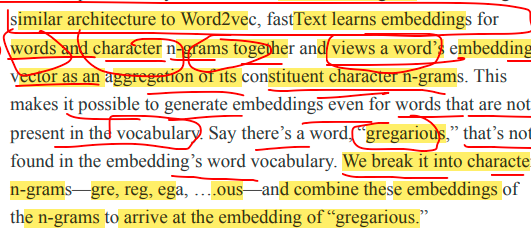

In [40]:
import gensim
from gensim.models import FastText
from gensim.utils import simple_preprocess

# The story corpus
story = [
    "Once upon a time, in a small village, there lived a young boy named Jack.",
    "Jack was known for his curiosity and adventurous spirit.",
    "One sunny morning, Jack decided to explore the forest near his village.",
    "As he walked deeper into the forest, he discovered a hidden path.",
    "Following the path, Jack found a mysterious old map lying on the ground.",
    "The map led to a treasure buried deep within the forest.",
    "Excited by the discovery, Jack decided to follow the map's directions.",
    "He encountered various obstacles along the way.",
    "First, he had to cross a fast-flowing river with slippery rocks.",
    "With great effort, Jack managed to get to the other side.",
    "Next, he had to find his way through a dark and creepy cave.",
    "Using his flashlight, Jack carefully navigated through the cave.",
    "He heard strange noises and saw shadows moving in the darkness.",
    "Determined to find the treasure, Jack pressed on.",
    "After exiting the cave, he found himself in a dense part of the forest.",
    "The trees were tall and their branches intertwined, blocking the sunlight.",
    "Jack used the map to find a small clearing where the treasure was supposed to be.",
    "In the clearing, he saw a large, ancient oak tree with a hollow trunk.",
    "Jack reached inside the hollow and felt something metallic.",
    "He pulled out a small, rusty chest covered in dirt and roots.",
    "With trembling hands, Jack opened the chest and found it filled with gold coins and precious jewels.",
    "Overwhelmed with joy, Jack couldn't believe his luck.",
    "He knew he had to share this discovery with his village.",
    "Jack carefully repacked the chest and started his journey back home.",
    "On his way back, he was more cautious of the obstacles he had previously faced.",
    "When Jack finally returned to the village, he was greeted with curiosity and excitement.",
    "He told the villagers about his adventure and showed them the treasure.",
    "The village celebrated Jack's return and his incredible discovery.",
    "Jack became a hero, and his story was told for generations.",
    "From that day on, Jack continued to explore and seek out new adventures."
]

# Preprocess the sentences
preprocessed_sentences = [simple_preprocess(sentence) for sentence in story]

# Train the FastText model
fasttext_model = FastText(sentences=preprocessed_sentences, vector_size=100, window=5, min_count=1, sg=1, workers=4)

# Save the model
fasttext_model.save("fasttext_model.model")

print("FastText model trained and saved.")



FastText model trained and saved.


In [43]:
# Load the model
fasttext_model = FastText.load("fasttext_model.model")
print("FastText model loaded.")

# Get the vector for a word
vector = fasttext_model.wv['gregarious']
print(f"Vector for 'gregarious': {vector}")


FastText model loaded.
Vector for 'jack': [ 3.03985528e-03  8.39735090e-04 -2.78221763e-04 -1.31292944e-03
  1.00451987e-03 -7.19515519e-05  7.56069028e-04  1.83961121e-03
 -3.32297815e-04  6.22621737e-05  5.58043539e-04 -4.95635904e-04
 -1.07202085e-03  5.99081686e-04 -3.34961689e-04  1.48741354e-03
  9.85120096e-07  1.38499588e-03  4.29408276e-04  8.15717969e-04
 -1.00317912e-03 -9.64517458e-05  1.52945577e-04 -9.40036145e-04
 -6.64705760e-04  7.77222333e-04 -1.08434341e-03 -1.10417930e-03
  1.25705579e-03 -1.37983728e-03 -9.97858442e-05 -2.23782961e-03
  8.62141605e-04 -6.73786562e-04  1.39590853e-03  1.08758453e-03
  1.80987394e-04 -1.25735148e-03 -1.84481870e-03  1.13270397e-03
  8.13711667e-04  1.42252701e-03 -9.49320849e-04  8.15024134e-04
  6.67483953e-04  1.23589794e-04  5.28305827e-04  8.68987408e-04
  1.41562114e-03  2.65130890e-04 -1.48810341e-03  2.42227994e-04
  1.63304561e-03 -4.29852866e-04 -1.68752682e-04  7.91633967e-04
 -2.53388449e-03 -7.60842871e-04 -7.40584917e-04

In [44]:

# Find similar words
similar_words = fasttext_model.wv.most_similar('gregarious')
print(f"Words similar to 'jack': {similar_words}")

Words similar to 'jack': [('various', 0.4864807426929474), ('great', 0.3075807988643646), ('the', 0.2560834586620331), ('he', 0.2322181612253189), ('finally', 0.2286132574081421), ('forest', 0.21500903367996216), ('there', 0.20916880667209625), ('mysterious', 0.20207351446151733), ('with', 0.20107392966747284), ('buried', 0.18957628309726715)]


# DOC2VEC

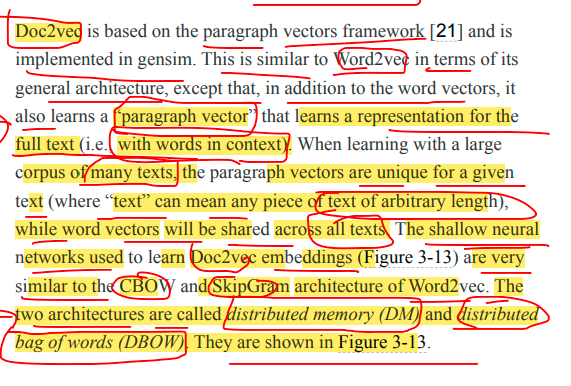

In [45]:
import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.utils import simple_preprocess

# The story corpus
story = [
    "Once upon a time, in a small village, there lived a young boy named Jack.",
    "Jack was known for his curiosity and adventurous spirit.",
    "One sunny morning, Jack decided to explore the forest near his village.",
    "As he walked deeper into the forest, he discovered a hidden path.",
    "Following the path, Jack found a mysterious old map lying on the ground.",
    "The map led to a treasure buried deep within the forest.",
    "Excited by the discovery, Jack decided to follow the map's directions.",
    "He encountered various obstacles along the way.",
    "First, he had to cross a fast-flowing river with slippery rocks.",
    "With great effort, Jack managed to get to the other side.",
    "Next, he had to find his way through a dark and creepy cave.",
    "Using his flashlight, Jack carefully navigated through the cave.",
    "He heard strange noises and saw shadows moving in the darkness.",
    "Determined to find the treasure, Jack pressed on.",
    "After exiting the cave, he found himself in a dense part of the forest.",
    "The trees were tall and their branches intertwined, blocking the sunlight.",
    "Jack used the map to find a small clearing where the treasure was supposed to be.",
    "In the clearing, he saw a large, ancient oak tree with a hollow trunk.",
    "Jack reached inside the hollow and felt something metallic.",
    "He pulled out a small, rusty chest covered in dirt and roots.",
    "With trembling hands, Jack opened the chest and found it filled with gold coins and precious jewels.",
    "Overwhelmed with joy, Jack couldn't believe his luck.",
    "He knew he had to share this discovery with his village.",
    "Jack carefully repacked the chest and started his journey back home.",
    "On his way back, he was more cautious of the obstacles he had previously faced.",
    "When Jack finally returned to the village, he was greeted with curiosity and excitement.",
    "He told the villagers about his adventure and showed them the treasure.",
    "The village celebrated Jack's return and his incredible discovery.",
    "Jack became a hero, and his story was told for generations.",
    "From that day on, Jack continued to explore and seek out new adventures."
]

# Preprocess the sentences
preprocessed_sentences = [simple_preprocess(sentence) for sentence in story]

# Tag the documents
tagged_data = [TaggedDocument(words=sentence, tags=[str(i)]) for i, sentence in enumerate(preprocessed_sentences)]

# Train the Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Save the model
doc2vec_model.save("doc2vec_model.model")

print("Doc2Vec model trained and saved.")

# Load the model
doc2vec_model = Doc2Vec.load("doc2vec_model.model")
print("Doc2Vec model loaded.")



Doc2Vec model trained and saved.
Doc2Vec model loaded.


In [54]:
# Get the vector for a document
doc_vector = doc2vec_model.dv['0']
print(f"Vector for the first document: \n{doc_vector}")


Vector for the first document: 
[-0.00645518 -0.00761548 -0.01032762  0.00921297  0.0036418  -0.00200761
 -0.00907522 -0.00307511 -0.01332165  0.00160081  0.00270478  0.00330631
 -0.00462808 -0.00151472 -0.00317942 -0.01010062  0.00395341  0.00696367
 -0.01140957 -0.00762901 -0.00400037  0.00214685 -0.00464514  0.00328386
  0.00664273 -0.0074127  -0.01045993 -0.01020512  0.00259873 -0.009943
  0.00875155  0.00807667 -0.00589938 -0.00469791 -0.00150217  0.00383679
 -0.00084145 -0.01030256 -0.00351406  0.0011577  -0.00132471 -0.00987805
  0.00141786 -0.0094471   0.00406188 -0.00478249 -0.00072965 -0.00248989
  0.00723485 -0.0067676  -0.00329112 -0.00128047 -0.00732923 -0.00801901
 -0.00303869  0.00994205 -0.00140983  0.0044201  -0.00730912  0.01105522
  0.00328486  0.01047477  0.00527871 -0.00535348  0.00076253 -0.00164827
  0.00739995  0.00494178 -0.00422278 -0.00245649 -0.00941813 -0.00055775
 -0.00923461 -0.00874508 -0.00625738  0.0036546  -0.0044382  -0.00701344
  0.00126954  0.00130

In [47]:
# Find similar documents
similar_docs = doc2vec_model.dv.most_similar('0')
print(f"Documents similar to the first document: {similar_docs}")


Documents similar to the first document: [('24', 0.28888946771621704), ('17', 0.2511860728263855), ('20', 0.2249629944562912), ('13', 0.22422747313976288), ('1', 0.21355031430721283), ('7', 0.21023814380168915), ('5', 0.19675077497959137), ('28', 0.17991016805171967), ('16', 0.16699229180812836), ('8', 0.14746715128421783)]


In [48]:
# Infer vector for a new document
new_doc = "Jack discovered an old map in the forest."
new_doc_vector = doc2vec_model.infer_vector(simple_preprocess(new_doc))
print(f"Vector for the new document: {new_doc_vector}")


Vector for the new document: [ 3.2241454e-03 -2.6437072e-03 -3.8166898e-03  5.0332630e-03
 -4.3175621e-03 -3.9246934e-03 -2.4354432e-03  1.3899874e-03
 -7.3204953e-03  7.4071053e-04 -3.3852062e-04  1.2520747e-03
 -1.0031358e-03  2.1476995e-03  2.2096587e-03  2.9960778e-03
 -3.3499040e-03 -3.9901491e-03  1.5054896e-03 -5.6430697e-04
  3.6349185e-03  1.3470124e-03  8.5158413e-04 -1.9616589e-03
  1.6959198e-03 -1.3381821e-03 -6.0121724e-03  2.9023206e-03
 -2.2267145e-03 -1.5150112e-03 -2.8301950e-03  6.4027059e-04
 -1.6286334e-03  3.2690172e-03  4.6962937e-03  5.3363321e-03
 -1.8107262e-03 -2.8126684e-03  4.0438119e-03 -2.8817102e-03
 -1.1799324e-03 -3.6011995e-03 -4.1818549e-04  7.5854117e-04
 -9.6440635e-04  4.8674648e-03 -4.5345216e-03  3.1497478e-03
  3.4114073e-03  2.2336943e-03 -8.5062126e-04 -5.2967928e-03
 -2.9378941e-03 -3.3587744e-03  1.8777148e-03 -2.2235352e-03
 -2.7788244e-03  4.9462458e-03  2.0292173e-03 -6.7929598e-04
 -3.7062876e-03 -7.7236415e-04  1.4484813e-03  5.9016782

In [49]:

# Find similar documents for the new document
similar_new_docs = doc2vec_model.dv.most_similar([new_doc_vector])
print(f"Documents similar to the new document: {similar_new_docs}")

Documents similar to the new document: [('8', 0.33293506503105164), ('9', 0.2940179407596588), ('22', 0.26075369119644165), ('23', 0.24878160655498505), ('18', 0.23380570113658905), ('17', 0.21441636979579926), ('27', 0.19136130809783936), ('12', 0.19123999774456024), ('25', 0.18157707154750824), ('4', 0.17171789705753326)]


In [67]:
test = "Excited by the discovery, Jack decided to follow the map's directions"
doc2vec_model.dv.most_similar(doc2vec_model.infer_vector(simple_preprocess(test)))

[('29', 0.32390096783638),
 ('9', 0.32336822152137756),
 ('20', 0.3067472279071808),
 ('12', 0.28783392906188965),
 ('21', 0.265572726726532),
 ('11', 0.2630990445613861),
 ('2', 0.2560143768787384),
 ('16', 0.2556379437446594),
 ('13', 0.25471314787864685),
 ('4', 0.2529362142086029)]

In [68]:
story[29]

'From that day on, Jack continued to explore and seek out new adventures.'

# EMBEDDING VISUALIZATION

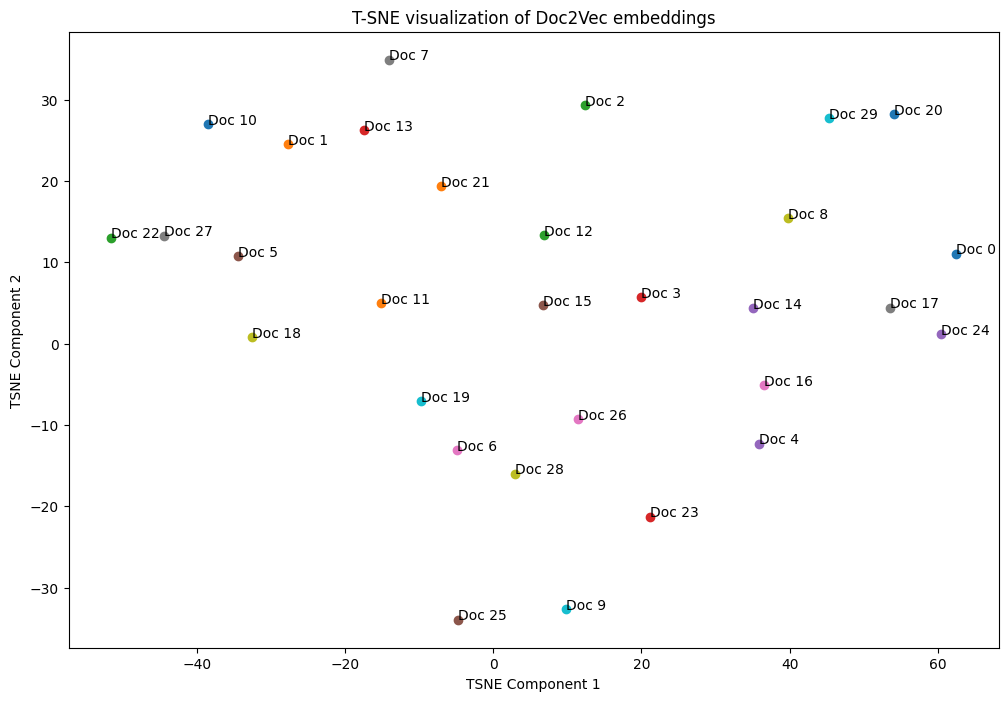

In [75]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
doc_vectors = torch.Tensor([doc2vec_model.dv[str(i)] for i in range(len(story))])

# Use TSNE to reduce dimensionality
tsne_model = TSNE(n_components=2, random_state=0, perplexity=5)  # Lower perplexity value
tsne_vectors = tsne_model.fit_transform(doc_vectors)

# Plot the TSNE results
plt.figure(figsize=(12, 8))
for i, vector in enumerate(tsne_vectors):
    plt.scatter(vector[0], vector[1])
    plt.annotate(f'Doc {i}', xy=(vector[0], vector[1]))
plt.title('T-SNE visualization of Doc2Vec embeddings')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()